In [4]:
df = pd.read_csv("metabric.csv")

In [7]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # Male = 1, Female = 0

In [6]:
X_cancer = df.drop(columns=['Cancer Type'])
y_cancer = df['Cancer Type']

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
X_cancer_numeric = X_cancer.select_dtypes(include=np.number)
scaler = StandardScaler()
X_cancer_scaled = scaler.fit_transform(X_cancer_numeric)

In [9]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cancer_scaled, y_cancer, test_size=0.2, random_state=42)


In [10]:
cancer_model = RandomForestClassifier()
cancer_model.fit(X_train_c, y_train_c)
y_pred_cancer = cancer_model.predict(X_test_c)

In [11]:
print("🎯 Cancer Detection")
print("Accuracy:", accuracy_score(y_test_c, y_pred_cancer))
print(classification_report(y_test_c, y_pred_cancer))

🎯 Cancer Detection
Accuracy: 0.99800796812749
                precision    recall  f1-score   support

 Breast Cancer       1.00      1.00      1.00       501
Breast Sarcoma       0.00      0.00      0.00         1

      accuracy                           1.00       502
     macro avg       0.50      0.50      0.50       502
  weighted avg       1.00      1.00      1.00       502



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
df_cancer_only = df[df['Cancer Type'] == 'Breast Cancer'].copy()
X_death = df_cancer_only.drop(columns=['Cancer Type', 'Patient\'s Vital Status']) # Assuming 'Patient\'s Vital Status' is the death level column based on the name
y_death = df_cancer_only['Patient\'s Vital Status']

In [13]:
X_death_numeric = X_death.select_dtypes(include=np.number)
X_death_scaled = scaler.fit_transform(X_death_numeric)

In [14]:
# Drop rows with missing values in the target variable
df_cleaned = df_cancer_only.dropna(subset=['Patient\'s Vital Status']).copy()

X_death = df_cleaned.drop(columns=['Cancer Type', 'Patient\'s Vital Status'])
y_death = df_cleaned['Patient\'s Vital Status']

X_death_numeric = X_death.select_dtypes(include=np.number)
scaler = StandardScaler()
X_death_scaled = scaler.fit_transform(X_death_numeric)


X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_death_scaled, y_death, test_size=0.2, random_state=42)

In [15]:
from sklearn.impute import SimpleImputer

# Impute missing values in the training and testing features
imputer = SimpleImputer(strategy='mean')
X_train_d_imputed = imputer.fit_transform(X_train_d)
X_test_d_imputed = imputer.transform(X_test_d)

death_model = RandomForestClassifier()
death_model.fit(X_train_d_imputed, y_train_d)
y_pred_death = death_model.predict(X_test_d_imputed)

In [16]:
print("\n⚰ Death Prediction (Cancer Patients)")
print("Accuracy:", accuracy_score(y_test_d, y_pred_death))
print(classification_report(y_test_d, y_pred_death))


⚰ Death Prediction (Cancer Patients)
Accuracy: 0.6691919191919192
                      precision    recall  f1-score   support

     Died of Disease       0.72      0.72      0.72       134
Died of Other Causes       0.53      0.38      0.44        98
              Living       0.68      0.80      0.74       164

            accuracy                           0.67       396
           macro avg       0.64      0.63      0.63       396
        weighted avg       0.66      0.67      0.66       396



In [17]:
features = X_death_numeric.columns
importances = death_model.feature_importances_
sorted_idx = np.argsort(importances)[::-1]

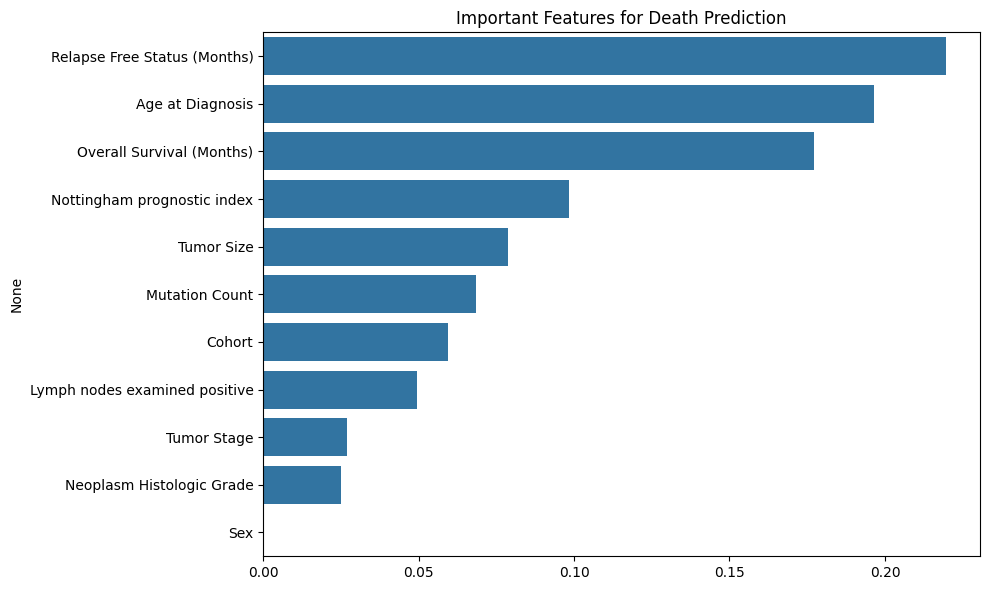

In [18]:

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx], y=features[sorted_idx])
plt.title("Important Features for Death Prediction")
plt.tight_layout()
plt.show()